In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Dataset Uploading

In [4]:
data=pd.read_csv('/content/IRIS.csv')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.shape

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# Dataset Duplicate Value Count
dup = data.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


In [11]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Understanding the data

In [16]:
# Dataset Columns
data.columns

# Use pd.Index instead of just Index.
pd.Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Dataset Describe (all columns included)
data.describe(include= 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [17]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print(data[i].nunique())

35
23
43
22
3


In [18]:
# We don't need the 1st column so let's drop that
data=data.iloc[:,1:]

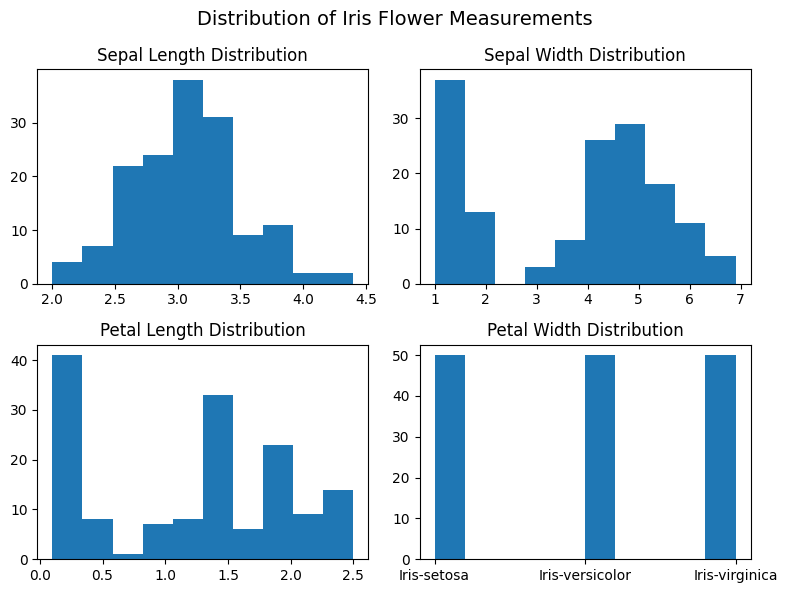

In [20]:
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data.iloc[:, 0])  # Access the first column by index
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data.iloc[:, 1])  # Access the second column by index
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data.iloc[:, 2])  # Access the third column by index
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data.iloc[:, 3])  # Access the fourth column by index
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

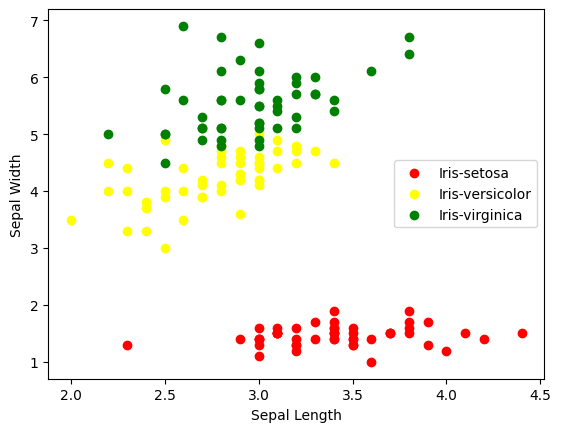

In [24]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    # Access the 'species' column using its actual name, likely 'Species'
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    # Use actual column names from the DataFrame 'x'
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

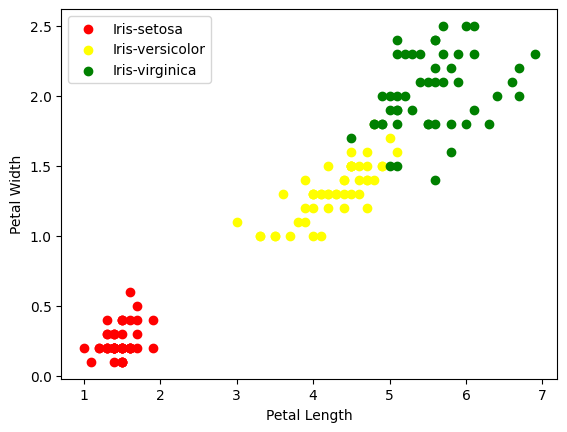

In [27]:
for i in range(3):
    # Select data for the current species.
    x = data[data['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    # Access columns using their actual names from 'x' or 'data'
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

Correlation HeatMap

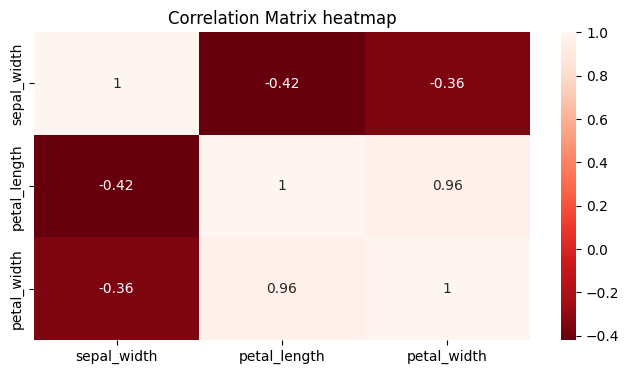

In [29]:
corr_matrix = data.drop(columns=['species']).corr()  # Exclude the 'species' column

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

In [31]:
# Defining the X and y
x=data.drop(columns=['species'], axis=1)
y=data['species']

In [32]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [34]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    """
    Evaluates a machine learning model and prints performance metrics.

    Args:
        model: The machine learning model to evaluate.
        x_train: Training data features.
        x_test: Testing data features.
        y_train: Training data labels.
        y_test: Testing data labels.

    Returns:
        A list containing model scores: [precision_train, precision_test, recall_train,
                                        recall_test, acc_train, acc_test, F1_train, F1_test]
    """
    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [42]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])


In [35]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Confusion Matrix:


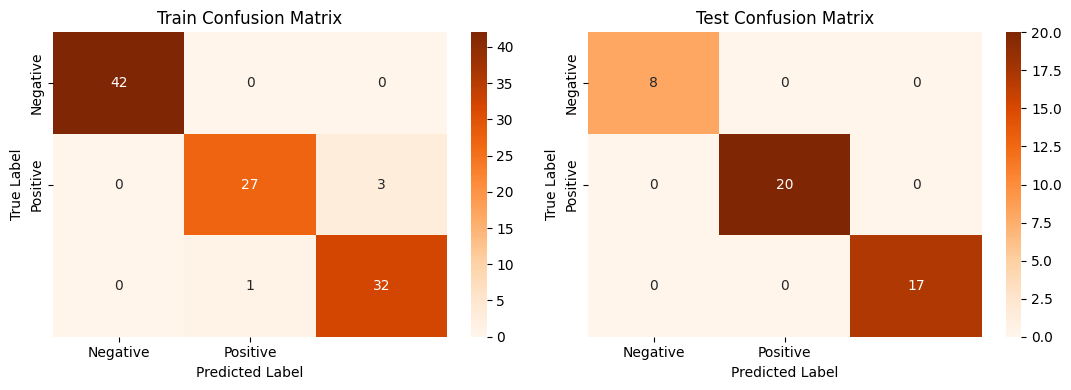


Train Classification Report:
|                 |   precision |   recall |   f1-score |    support |
|:----------------|------------:|---------:|-----------:|-----------:|
| Iris-setosa     |    1        | 1        |   1        |  42        |
| Iris-versicolor |    0.964286 | 0.9      |   0.931034 |  30        |
| Iris-virginica  |    0.914286 | 0.969697 |   0.941176 |  33        |
| accuracy        |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg       |    0.959524 | 0.956566 |   0.957404 | 105        |
| weighted avg    |    0.962857 | 0.961905 |   0.961808 | 105        |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |           1 |        1 |          1 |         8 |
| Iris-versicolor |           1 |        1 |          1 |        20 |
| Iris-virginica  |           1 |        1 |          1 |        17 |
| accuracy        |    

In [36]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [43]:
score['Logistic regression'] = lr_score
print(score)

                 Logistic regression
Precision Train             0.962857
Precision Test              1.000000
Recall Train                0.961905
Recall Test                 1.000000
Accuracy Train              0.961905
Accuracy Test               1.000000
F1 macro Train              0.961808
F1 macro Test               1.000000


In [44]:
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)


Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}



Confusion Matrix:


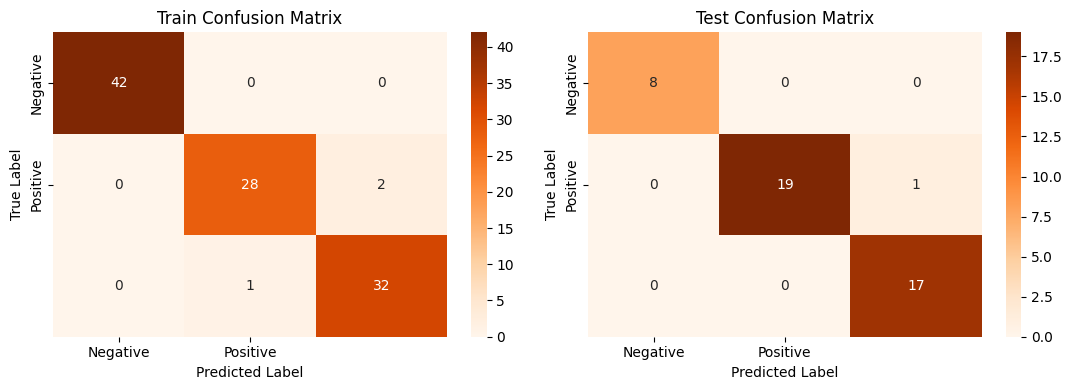


Train Classification Report:
|                 |   precision |   recall |   f1-score |    support |
|:----------------|------------:|---------:|-----------:|-----------:|
| Iris-setosa     |    1        | 1        |   1        |  42        |
| Iris-versicolor |    0.965517 | 0.933333 |   0.949153 |  30        |
| Iris-virginica  |    0.941176 | 0.969697 |   0.955224 |  33        |
| accuracy        |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg       |    0.968898 | 0.967677 |   0.968125 | 105        |
| weighted avg    |    0.97166  | 0.971429 |   0.9714   | 105        |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |  8        |
| Iris-versicolor |    1        | 0.95     |   0.974359 | 20        |
| Iris-virginica  |    0.944444 | 1        |   0.971429 | 17        |
| accuracy        |    

In [45]:
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)


In [46]:
print(score)

                 Logistic regression
Precision Train             0.962857
Precision Test              1.000000
Recall Train                0.961905
Recall Test                 1.000000
Accuracy Train              0.961905
Accuracy Test               1.000000
F1 macro Train              0.961808
F1 macro Test               1.000000



Confusion Matrix:


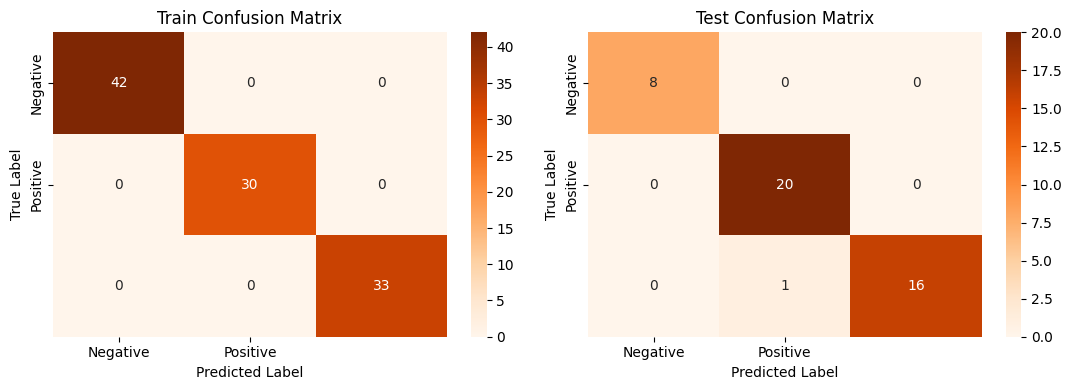


Train Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |           1 |        1 |          1 |        42 |
| Iris-versicolor |           1 |        1 |          1 |        30 |
| Iris-virginica  |           1 |        1 |          1 |        33 |
| accuracy        |           1 |        1 |          1 |         1 |
| macro avg       |           1 |        1 |          1 |       105 |
| weighted avg    |           1 |        1 |          1 |       105 |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |  8        |
| Iris-versicolor |    0.952381 | 1        |   0.97561  | 20        |
| Iris-virginica  |    1        | 0.941176 |   0.969697 | 17        |
| accuracy        |    0.977778

In [48]:
dt_model = DecisionTreeClassifier(random_state=20)
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)
score['Decision Tree'] = dt_score
print(score)

In [49]:
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 4}



Confusion Matrix:


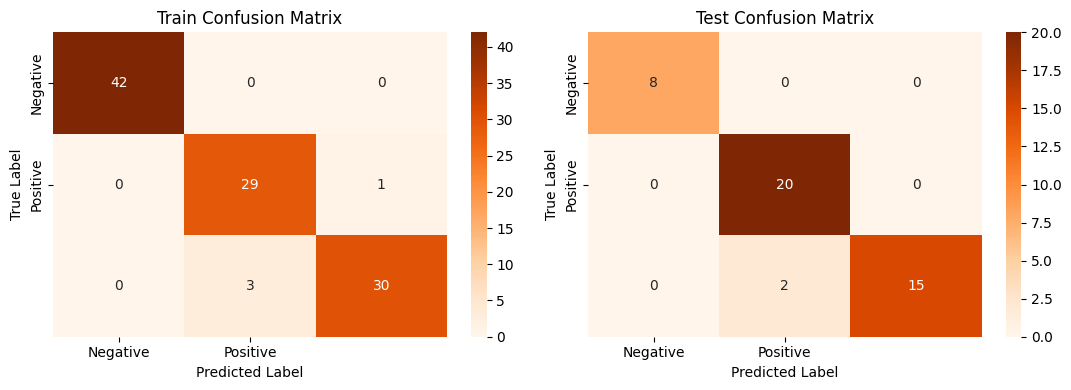


Train Classification Report:
|                 |   precision |   recall |   f1-score |    support |
|:----------------|------------:|---------:|-----------:|-----------:|
| Iris-setosa     |    1        | 1        |   1        |  42        |
| Iris-versicolor |    0.90625  | 0.966667 |   0.935484 |  30        |
| Iris-virginica  |    0.967742 | 0.909091 |   0.9375   |  33        |
| accuracy        |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg       |    0.957997 | 0.958586 |   0.957661 | 105        |
| weighted avg    |    0.963076 | 0.961905 |   0.961924 | 105        |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |  8        |
| Iris-versicolor |    0.909091 | 1        |   0.952381 | 20        |
| Iris-virginica  |    1        | 0.882353 |   0.9375   | 17        |
| accuracy        |    

In [50]:
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [51]:
rf_model = RandomForestClassifier(random_state=0)


Confusion Matrix:


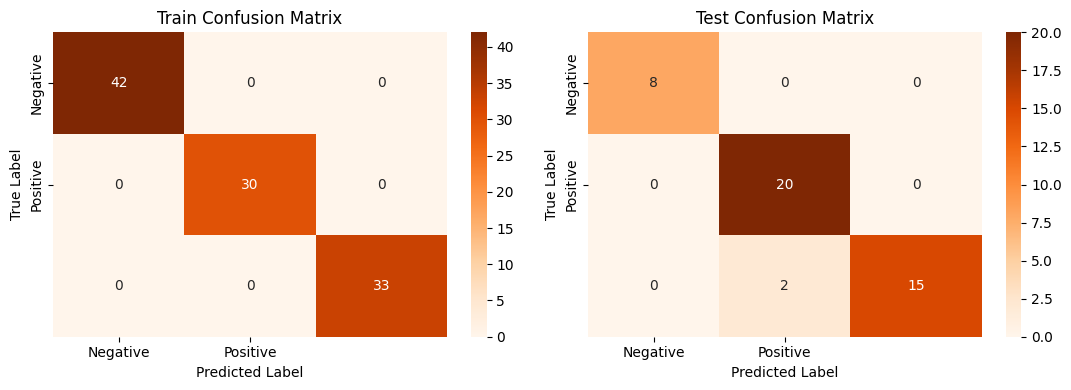


Train Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |           1 |        1 |          1 |        42 |
| Iris-versicolor |           1 |        1 |          1 |        30 |
| Iris-virginica  |           1 |        1 |          1 |        33 |
| accuracy        |           1 |        1 |          1 |         1 |
| macro avg       |           1 |        1 |          1 |       105 |
| weighted avg    |           1 |        1 |          1 |       105 |

Test Classification Report:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        |  8        |
| Iris-versicolor |    0.909091 | 1        |   0.952381 | 20        |
| Iris-virginica  |    1        | 0.882353 |   0.9375   | 17        |
| accuracy        |    0.955556

In [52]:
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [53]:
score['Random Forest'] = rf_score

In [54]:
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 4, 'max_depth': 10}


In [55]:
print(score.to_markdown())

|                 |   Logistic regression |   Decision Tree |   Random Forest |
|:----------------|----------------------:|----------------:|----------------:|
| Precision Train |              0.962857 |        1        |        1        |
| Precision Test  |              1        |        0.978836 |        0.959596 |
| Recall Train    |              0.961905 |        1        |        1        |
| Recall Test     |              1        |        0.977778 |        0.955556 |
| Accuracy Train  |              0.961905 |        1        |        1        |
| Accuracy Test   |              1        |        0.977778 |        0.955556 |
| F1 macro Train  |              0.961808 |        1        |        1        |
| F1 macro Test   |              1        |        0.977712 |        0.955225 |


In [56]:
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression,0.962857,1.0,0.961905,1.0,0.961905,1.0,0.961808,1.0


In [58]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models


metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

The best models are:
Precision: Logistic regression - 1.0
Recall: Logistic regression - 1.0
Accuracy: Logistic regression - 1.0
F1 macro: Logistic regression - 1.0
| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| Logistic regression    |       0.961905 |             1 |


In [64]:
# Define a list of category labels for reference.
Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']


# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.
x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])

# Assuming x_train contains ['sepal_length', 'petal_length', 'petal_width']
# Select the corresponding columns from x_rf
x_rf = x_rf[:, [0, 2, 3]]  # Select columns 0, 2, and 3

# Instantiate the RandomForestClassifier with the best hyperparameters from the grid search
rf_model2 = RandomForestClassifier(random_state=0, **best_params) # Assuming best_params from the grid search is available

# Train the model (this step is crucial and was missing)
rf_model2.fit(x_train, y_train)

# Use the tuned random forest model (rf_model2) to make a prediction.
x_rf_prediction = rf_model2.predict(x_rf)

# Display the predicted category label directly.
print(x_rf_prediction[0]) # Print the predicted label directly, no need for indexing into Category_RF

Iris-setosa
